# Implementation Of The Finite Difference Scheme For The Diffusion Equation

## Semi Explicit Algorithm

The system is

$$
    \newcommand{\qty}[1]
    {
        \left({#1}\right)
    }
    \newcommand{\qtys}[1]
    {
        \left[{#1}\right]
    }
$$     

\begin{align}
    \frac{\partial C_+}{\partial \tau} &= \mathcal{D}_+\qty{\nabla^2 C_+ - \nabla\qty{C_+ \nabla \Psi}}, \\
    \frac{\partial C_-}{\partial \tau} &= \mathcal{D}_-\qty{\nabla^2 C_- + \nabla\qty{C_- \nabla \Psi}}, \\
    \nabla^2 \Psi &= \frac{\qty{z\mathcal{F}}^2}{\epsilon RT}\qty{C_- - C_+}
\end{align}

With boundary conditions

\begin{align}
    J_+(x = 0) &= -\mathcal{D}_+\qty{\frac{\partial C_+}{\partial x}\bigg|_{x= 0} - C_+ \frac{\partial}{\partial x}\Psi}= 0\\
    J_-(x = 0) &= -\mathcal{D}_-\qty{\frac{\partial C_-}{\partial x}\bigg|_{x= 0} + C_- \frac{\partial}{\partial x}\Psi}  = 0\\
    C_+(\delta) = C_b\\
    C_-(\delta) = C_b\\
    \Psi(x = 0) &= \frac{z\mathcal{F}}{RT} \phi(x=0)\\
    \frac{\partial\Psi}{\partial x}\bigg|_{x = \delta} &= 0
\end{align}



# Descrete equations

For each species ($s = \pm$) we have

\begin{align}
    -\alpha C_s^{n+1, k-1} + (1 + 2 \alpha) C_s^{n+1, k} - \alpha C_s^{n+1, k+1} =& C_s^{n,k} \qty{1 + s \alpha \qty{\Psi^{n, k} - \Psi^{n, k-1}}} - s \alpha C_s^{n, k+1}  \qty{\Psi^{n,k+1} - \Psi^{n,k}}.\\
    \Psi^{n+1, k+1} - 2\Psi^{n+1,k} + \Psi^{n+1, k-1} =& C_+^{n+1, k} - C_-^{n+1, k}
\end{align}

where we have taken the laplacian as implicit (evaluated at n+1) and the electric field part as explicit (evaluated at n).




### Descritizing boundary conditions

Boundary conditions are drawn from the flux and can be found to be (in descrite form)

\begin{align}
C_s^{n+1, 0} &= \gamma_s C_s^{n+1, 1},\\
C_s^{n+1, M} &= C_b,\\
\Psi^{n+1, 0} &= \Psi_0,\\
\Psi^{n+1, M} &= 0\\
\Psi^{n+1, M} &= \Psi^{n+1, M-1} 
\end{align}


with

\begin{align}
\gamma_s &= \frac{1}{1 + s\qty{\Psi^{n+1, 1}-\Psi^{n+1,0}} }
\end{align}

This equations yield the following boundary equations

$$ k=1 $$

\begin{align}
 (1 + 2 \alpha - \alpha\gamma) C_s^{n+1, 1} - \alpha C_s^{n+1, 2} =& C_s^{n,1} \qty{1 + s \alpha \qty{\Psi^{n, k} - \Psi^{n, k-1}}} - s \alpha C_s^{n, 2}  \qty{\Psi^{n,k+1} - \Psi^{n,k}}.\\
    \Psi^{n+1, 2} - 2\Psi^{n+1,1} + \Psi^{n+1, 0} =& C_+^{n+1, 1} - C_-^{n+1, 1}
\end{align}


$$ k = m-1$$

\begin{align}
    -\alpha C_s^{n+1, M-2} + (1 + 2 \alpha) C_s^{n+1, M-1} =& C_s^{n,M-1} \qty{1 + s \alpha \qty{\Psi^{n, M-1} - \Psi^{n, M-2}}} - s \alpha C_b  \qty{\Psi^{n,k+1} - \Psi^{n,k}} + \alpha C_b.\\
     - \Psi^{n+1,M-1} + \Psi^{n+1, M-2} =& C_+^{n+1, M-1} - C_-^{n+1, M-1}
\end{align}


### Matrix equations

We can write the system as follows

\begin{align}
\bf{A} \cdot \underline{C_s^{n+1}} = \underline{C_s^{n}} + s\alpha\bf{B}(\Psi^{n}) \cdot \underline{C_s^{n}} + \bf{Bo}\\
\bf{D} \underline{\Psi}^{n+1} = \Delta \xi ^2\qty{\underline{C_-}^{n+1} - \underline{C_+}^{n+1}}- \underline{b}
\end{align}

\begin{align}
    \bf{Bo} = \begin{bmatrix}
        0\\
        \vdots\\
        0\\
        \alpha C_b
    \end{bmatrix}
\end{align}


where

\begin{align}
A = \begin{bmatrix}
    1 + 2 \alpha - \alpha \gamma_s   &  \alpha   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    \alpha    &   1 + 2 \alpha       &  \alpha   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & \alpha               &  1 + 2 \alpha  & \alpha   & \cdots   &   0   &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  \alpha    &  1+2\alpha &    \alpha   &    0 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  \alpha    &  1+2\alpha 
\end{bmatrix}
\end{align}

,

\begin{align}
B(\Psi) = \begin{bmatrix}
    -\qty{\Psi^{n,1} - \Psi^{n, 0}}   &  \qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    0                                & - \qty{\Psi^{n,1} - \Psi^{n, 0}}    & \qty{\Psi^{n,2} - \Psi^{n, 1}}   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 0                    &  -\qty{\Psi^{n,2} - \Psi^{n, 1}}    & \qty{\Psi^{n,3} - \Psi^{n, 2}} & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  0         & -\qty{\Psi^{n,M-2} - \Psi^{n, M-3}}   & \qty{\Psi^{n,M-1} - \Psi^{n, M-2}} \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  0    &  -\qty{\Psi^{n,M-1} - \Psi^{n, M-2}}
\end{bmatrix}
\end{align}

and
\begin{align}
D = \begin{bmatrix}
    -2   &  1   & 0  &   \cdots & 0   &   0   &   0   &   0 \\
    1    &  -2    & 1   & 0  & \cdots   & 0   &   0   &   0 \\
    0         & 1                    &  -2   & 1 & \cdots    &   0   &   0 \\
    \vdots    &  \vdots              &\vdots          &  \vdots  & \vdots   &\vdots & \vdots & \vdots \\ 
    0         &  0                   &  \cdots        &  0       &  0         &  1         & -2   & 1 \\
0         &  0                   &  \cdots        &  0           &  0         &     0      &  1    &  -1
\end{bmatrix}.
\end{align}

\begin{align}
    b = \begin{bmatrix}
        \Psi_0\\
        0\\
        \vdots\\
        0
    \end{bmatrix}
\end{align}

We define matrix $\bf{Z}$ as

\begin{align}
    Z_s = \bf{1} + s\alpha B(\underline{Psi})
\end{align}

Therefore we can write

\begin{align}
\underline{C_s^{n+1}} = \bf{A}^{-1} \cdot\qty{ \qty{ \bf{1} + s\alpha\bf{B}(\Psi^{n})} \cdot \underline{C_s^{n}} + \cdot \bf{Bo}}\\
\underline{\Psi}^{n+1} = \bf{D}^{-1}\cdot \qty{\Delta \xi ^2\qty{\underline{C_-}^{n+1} - \underline{C_+}^{n+1}}- \underline{b}}
\end{align}

In [7]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

# Define grid parameters
N = 8000
M = 40
xi = np.linspace(0,1, M)
tau = np.linspace(0,1, N) #shape is N+1 
dtau = 1/(N)  # N Partitions 
dxi = 1/(M) # N Partitions 
a = dtau / (dxi ** 2) 
 
#Define Model Parameters
params = { 
    'bulkConcentration': 100, 
    'diffusionCoefficient': 1.07e-9, 
    'laminarFlowRegion': 1e-10, 
    'reactionRate': 1e-1,
    "z": 2,
    "e": 1.60217662E-19,
    "kb": 1.38064852E-23,
    "T": 300,
    "Na": 6.02E23,
    "Fa": 96485.3329, #Na * e
    "R": 8.314472,
    "V0": -0.15,
    "D1": 1.05,
    "D2":  0.76,
    "Cb": 100,
    "epsilon": 80.9 * 8.85418782E-12,
    "length": 20.0
}

Cb = params['bulkConcentration']
D = params['diffusionCoefficient']
d = params['laminarFlowRegion']
kf = params['reactionRate']
z = params['z']
F = params['Fa']
R = params['R']
T = params['T']
epsilon = params['epsilon']
kappa =  np.sqrt(( ( z * F  ) ** 2 * Cb ) / ( epsilon * R * T ) )

print(z * F / (R * T))
def Model():
    
    #Set up initial/border conditions for \rho 
    rho1 = np.zeros([N, M])
    rho2 = np.zeros([N, M])
    rho1[0, :] = np.zeros(M)
    rho1[0, -1] = 1
    rho2[0, :] = np.zeros(M)
    rho2[0, -1] = 1
    
    Bo = np.zeros(M-2)
    Bo[-1] = a * Cb

    #vectorize boundary condition for Psi
    Psi0 = z * F / ( R * T ) * params['V0']
    b = np.zeros(M-2)
    b[0] = Psi0
    Psi = np.zeros([N, M])
    #Initial Condition: linear profile
    #Psi at 1 = 0
    Psi[0, :] = Psi0 * (np.ones(M) - xi)
    #dPsi at 1 = 0
    #Psi[0, :] = Psi0 * np.ones(M)

    #Electric Field
    E = np.zeros([N,M])
    
    #"Interaction Matrix B for n = 0"
    B = diags(np.array([ np.zeros(M-2), np.zeros(M-3)]), [0, 1], shape=(M-2, M-2)).toarray() #interaction with Psi matrix
    
    #Define D matrix (Psi descretized system of equations)
    D = diags(np.array([ np.ones(M-3), -2 * np.ones(M-2), np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
    
    #dPsi at 1 = 0
    D[-1, -1] = -1
    D_inv = np.asarray(np.linalg.inv(D))
    
    print("Starting iteration")
    #Starting iteration
    for n in range(0, N-1):
        
        #print(str(n+1) + "/" + str(N), end='')
        #Compute boundary condition for C_+ and Define Matrix A and Z_+ = 1 + a * B_+
        g_p = 1 / ( 1 + (Psi[n, 1] - Psi0)  )
        
        if( g_p < 0 or np.isnan(g_p) ):
            print("Error in gamma_+")
            print("Last computed term: " + str(n))
            print("or t = ", dtau * n)
            break
            
        di_ = ( 1 + 2 * a ) * np.ones(M-2) #Diagonal vector for tri-diagonal matrix A1
        di_[0] = ( 1 + 2 * a - g_p * a )
        A1 = diags(np.array([- a * np.ones(M-3), di_ , -a * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        A1_inv = np.asarray(np.linalg.inv(A1))
            
        Z1 = np.identity(M-2) + a * B
        
        #Compute boundary condition for C_- and Define Matrix A_- and Z_- = A_- - a * B_-
        g_m = 1 / ( 1 - (Psi[n, 1] - Psi0))
        di_[0] = ( 1 + 2 * a - g_m * a )  #Boundary condition for second electrolyte (the rest of vector di stays the same)
        A2 = diags(np.array([ - a * np.ones(M-3), di_,  -a * np.ones(M-3)]), [-1, 0, 1], shape=(M-2, M-2)).toarray()
        A2_inv = np.asarray(np.linalg.inv(A2))
        Z2 = np.identity(M-2) - a * B
        
        #Compute next time-step for C_+ (rho1)
        rho1[n+1, 1:M-1] = np.matmul(A1_inv, np.matmul( Z1, rho1[n, 1:M-1] ) + Bo)
        rho1[n+1, 0] = g_p * rho1[n+1, 1]
        rho1[n+1, -1] = Cb
        
        #Compute next time-step for C_- (rho2)
        rho2[n+1, 1:M-1] = np.matmul(A2_inv, np.matmul( Z2, rho2[n, 1:M-1] + Bo ))
        rho2[n+1, 0] =  g_m * rho2[n+1, 1]
        rho2[n+1, -1] = Cb
        
        ##UPDATE PSI
        Psi[n+1, 1:M-1] = np.matmul( D_inv, dxi ** 2 * (rho2[n+1, 1:M-1] - rho1[n+1, 1:M-1]) - b )
        Psi[n+1, 0] = Psi0
        #dPsi at 1 = 0
        Psi[n+1, -1] = Psi[n+1, -2]
    
        E[n+1, 0:M-1] =  (Psi[n+1, 1:M] - Psi[n+1, 0:M-1]) / dxi
        E[n+1, -1] = 0
        
        ##UPDATE B MATRIX WITH NEW PSI
        #dPsi at 1 = 0
        #B = diags(np.array([ E[n+1, 0:M-1],  -E[n+1, 1:M]]), [0, 1], shape=(M-2, M-2)).toarray() #interaction with Psi matrix
        

    print('Done computing')
    #Once done, return the N X M Matrixes rho1, rho2 and Psi
    return  rho1, rho2, Psi, E

#Cm is the imported analytical solution
def remove_points(A):
    A = np.delete(A, [1, 2, 3])
    for i in range(0,int(len(A)/4)):
        index = i+4
        A = np.delete(A, [index-2, index-1, index])
    return A

C1, C2, Psi, E = Model()

77.36336747140005
Starting iteration
Done computing


## Numeric solution for consumtion reaction rate

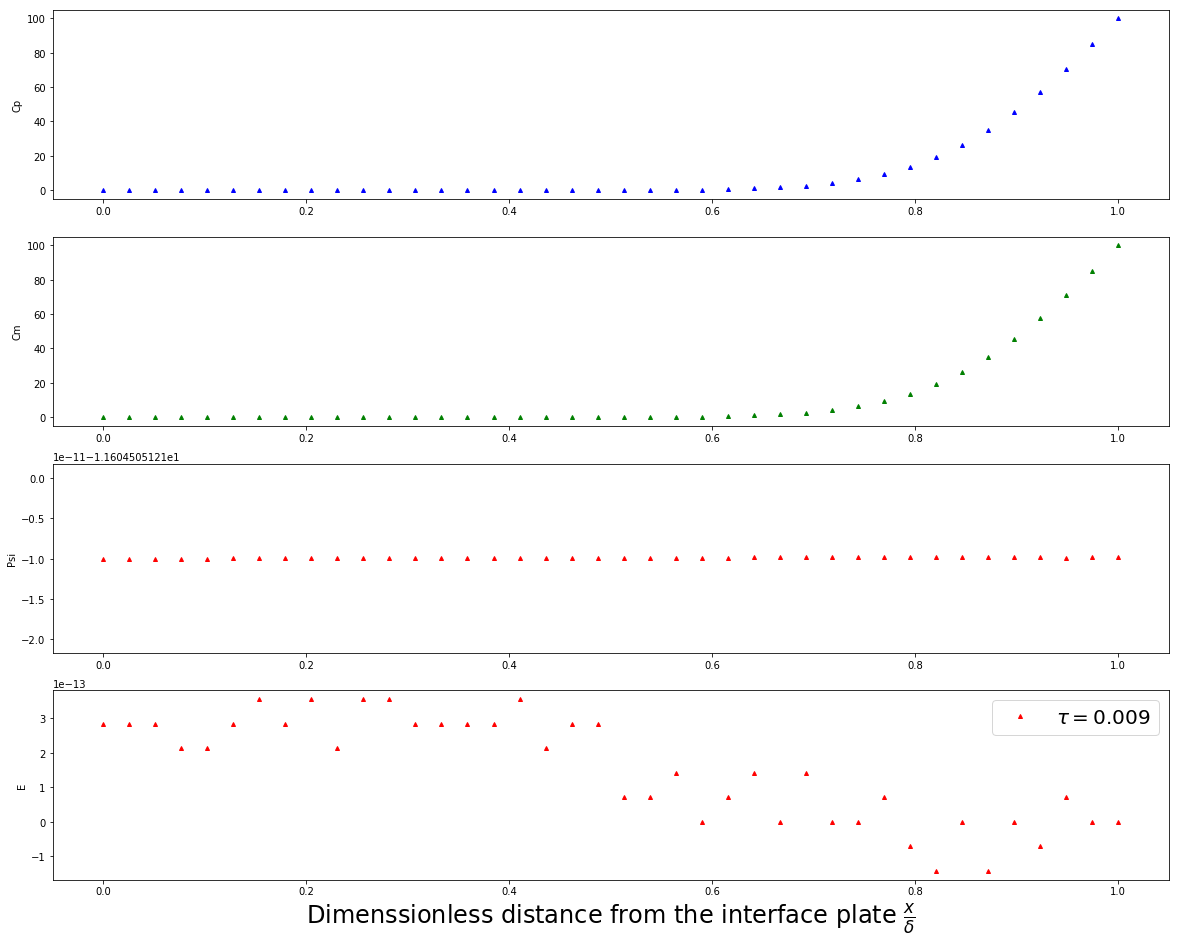

In [17]:

mw = 4
fs = 24
xi2 = remove_points(xi) # this is done to avoid cluttering of numeric points over the analytic solution
fig1 = plt.figure(figsize=(20,16))
t = 0.009
n =  int(t/dtau)

plt.title('Comparing Numeric Solution To The Diffusion Reaction And Analytic Solution \n To The Diffusion-Only Problem', fontsize=fs, fontweight='bold')

plt.subplot(411)
plt.ylabel('Cp')
plt.plot(xi, (C1[n]), 'b^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(412)
plt.ylabel('Cm')
plt.plot(xi, (C2[n]), 'g^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(413)
plt.ylabel('Psi')
plt.plot(xi, (Psi[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(414)
plt.ylabel('E')
plt.plot(xi, (E[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.xlabel(r'Dimenssionless distance from the interface plate $\frac{x}{\delta}$', fontsize=fs)
#plt.ylabel(r'Dimenssionless time parameter from initial state $\frac{Dt}{\delta^2}$', fontsize=fs)
#plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
#plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
plt.legend(fontsize = fs-4)
plt.savefig('../../../img/concentration-diffusion-reaction-comparison.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()




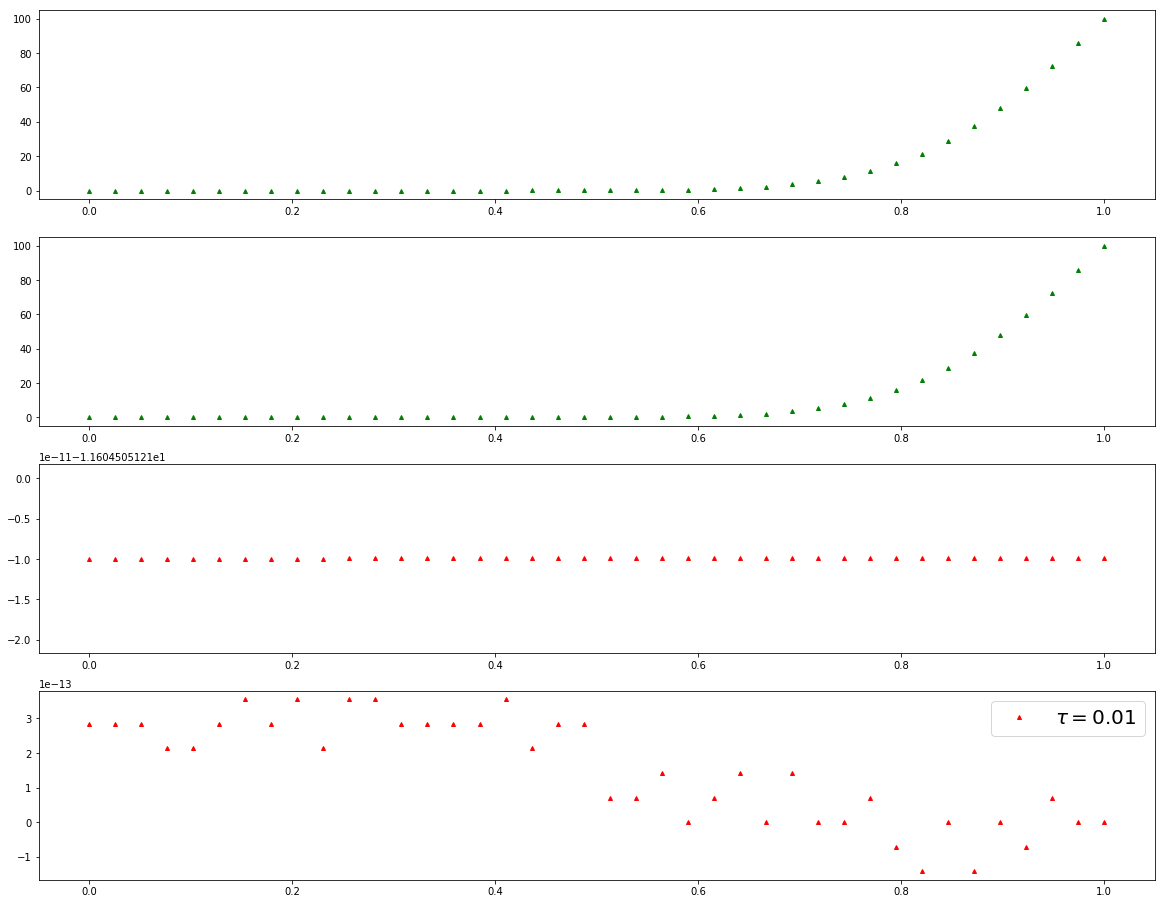

In [12]:
t = 0.01
n = int(t/dtau)
fig2 = plt.figure(figsize=(20,16))
plt.subplot(411)
plt.plot(xi, C2[n], 'g^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(412)
plt.plot(xi, C1[n], 'g^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(413)
plt.plot(xi, (Psi[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')
plt.subplot(414)
plt.plot(xi, (E[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')
#plt.xlabel(r'Dimenssionless distance from the interface plate $\frac{x}{\delta}$', fontsize=fs)
#plt.ylabel(r'Dimenssionless time parameter from initial state $\frac{Dt}{\delta^2}$', fontsize=fs)
#plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
#plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
plt.legend(fontsize = fs-4)
plt.savefig('../../../img/concentration-diffusion-reaction-comparison.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()


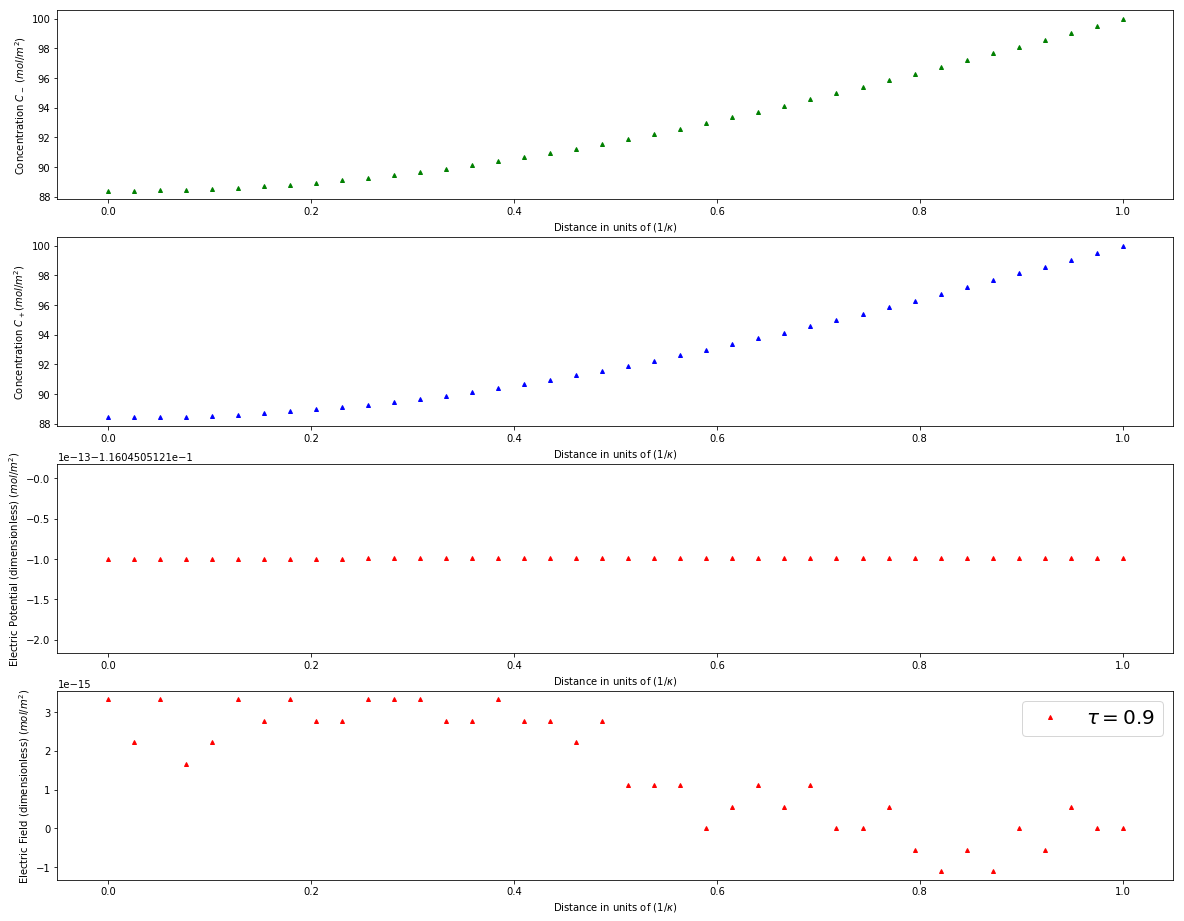

In [5]:
t = 0.9
n = int(t/dtau)
fig3 = plt.figure(figsize=(20,16))
plt.subplot(411)
plt.xlabel(r'Distance in units of ($1/\kappa$)')
plt.ylabel(r'Concentration $C_-$ ($mol/m^2$)')

plt.plot(xi, C2[n], 'g^', markersize=mw, label=r'$\tau='+str(t)+'$')

plt.subplot(412)
plt.xlabel(r'Distance in units of ($1/\kappa$)')
plt.ylabel(r'Concentration $C_+$($mol/m^2$)')
plt.plot(xi, (C1[n]), 'b^', markersize=mw, label=r'$\tau='+str(t)+'$')


plt.subplot(413)
plt.xlabel(r'Distance in units of ($1/\kappa$)')
plt.ylabel(r'Electric Potential (dimensionless) ($mol/m^2$)')
plt.plot(xi, (Psi[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')

plt.subplot(414)
plt.xlabel(r'Distance in units of ($1/\kappa$)')
plt.ylabel(r'Electric Field (dimensionless) ($mol/m^2$)')
plt.plot(xi, (E[n]), 'r^', markersize=mw, label=r'$\tau='+str(t)+'$')

#plt.xlabel(r'Dimenssionless distance from the interface plate $\frac{x}{\delta}$', fontsize=fs)
#plt.ylabel(r'Dimenssionless time parameter from initial state $\frac{Dt}{\delta^2}$', fontsize=fs)
#plt.text(0.9, 40, r'Reaction Rate', fontsize = 14, color = 'black')
#plt.text(0.9, 37, r'$r = - 1.5 \times 10 \frac{A}{m^2}$', fontsize = 14, color = 'black')
plt.legend(fontsize = fs-4)
plt.savefig('../../../img/concentration-diffusion-reaction-comparison.eps', format='eps', dpi=1000, fontsize=16, fontweight='bold')
plt.show()